In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors

import seaborn as sns

In [17]:
def elbow_dbscan(data, n_neighbors = 20):
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

In [2]:
df = pd.read_csv("./anime.csv")

In [74]:
# sorted_ = df[["Name", "Score", "Genres","Episodes", "Ranked", "Popularity", "Members", "Favorites", "Watching", "Completed", "On-Hold", "Dropped", "Plan to Watch"]]
sorted_ = df.drop(["English name", "Japanese name", "Aired" ,"Premiered", "Type", 
                    "Producers", "Licensors", "Studios", "Source", "Duration", "Rating"], axis=1)
sorted_ = sorted_[(sorted_["Score"] != "Unknown")& (sorted_["Episodes"] != "Unknown")& (sorted_["Ranked"] != "Unknown")& (sorted_["Members"] != "0")]
sorted_["Score-10"] = sorted_["Score-10"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-9"] = sorted_["Score-9"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-8"] = sorted_["Score-8"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-7"] = sorted_["Score-7"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-6"] = sorted_["Score-6"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-5"] = sorted_["Score-5"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-4"] = sorted_["Score-4"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-3"] = sorted_["Score-3"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-2"] = sorted_["Score-2"].apply(lambda x: 0.0 if x == "Unknown" else float(x))
sorted_["Score-1"] = sorted_["Score-1"].apply(lambda x: 0.0 if x == "Unknown" else float(x))

In [75]:
sorted_["all_score"] = sorted_["Score-10"] + sorted_["Score-9"] + sorted_["Score-8"] + sorted_["Score-7"]+ \
                    sorted_["Score-6"] + sorted_["Score-5"] + sorted_["Score-4"] + sorted_["Score-3"] + \
                    sorted_["Score-2"] + sorted_["Score-1"]
sorted_["positive"] = (sorted_["Score-10"]+ sorted_["Score-9"]) / sorted_["all_score"]
sorted_["negative"] = (sorted_["Score-1"]+ sorted_["Score-2"]+ sorted_["Score-3"]+ sorted_["Score-4"]+ sorted_["Score-5"]+ sorted_["Score-6"]) / sorted_["all_score"]
sorted_["NPS"] = sorted_["positive"] - sorted_["negative"]
sorted_.drop(["Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", "Score-4", "Score-3", "Score-2", "Score-1", "positive", "negative", "all_score"], 
           axis=1, inplace=True)
sorted_.set_index('Name', inplace=True)

In [76]:
sorted_

,MAL_ID,Score,Genres,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,NPS
Name,,,,,,,,,,,,,,
Cowboy Bebop,1,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,28.0,39,1251960,61971,105808,718161,71513,26678,329800,0.584134
Cowboy Bebop: Tengoku no Tobira,5,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1,159.0,518,273145,1174,4143,208333,1935,770,57964,0.438269
Trigun,6,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26,266.0,201,558913,12944,29113,343492,25465,13925,146918,0.353624
Witch Hunter Robin,7,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",26,2481.0,1467,94683,587,4300,46165,5121,5378,33719,-0.086254
Bouken Ou Beet,8,6.98,"Adventure, Fantasy, Shounen, Supernatural",52,3710.0,4369,13224,18,642,7314,766,1108,3394,-0.217120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kimetsu Gakuen: Valentine-hen,47398,6.59,Comedy,4,5461.0,3814,18161,72,617,6978,118,62,10386,-0.349436
Heikousen,47402,7.52,"Music, Romance",1,1517.0,10869,832,27,17,549,8,1,257,0.202864
Nu Wushen de Canzhuo Spring Festival Special,47614,6.83,"Slice of Life, Comedy",1,4382.0,11973,540,8,51,168,18,2,301,-0.068376


In [77]:
norm_df = pd.DataFrame(data=sorted_[["Score", "NPS", "Popularity"]], index = sorted_.index.values)
norm_df["Favorites"] = sorted_["Favorites"]/sorted_["Members"]
norm_df["Watching"] = sorted_["Watching"]/sorted_["Members"]
norm_df["Completed"] = sorted_["Completed"]/sorted_["Members"]
norm_df["On-Hold"] = sorted_["On-Hold"]/sorted_["Members"]
norm_df["Dropped"] = sorted_["Dropped"]/sorted_["Members"]
norm_df["Plan to Watch"] = sorted_["Plan to Watch"]/sorted_["Members"]

# norm_df.fillna(0, inplace=True)
# norm_df.dropna(inplace=True)
print(norm_df.isna().sum())

scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(norm_df), columns=norm_df.columns, index = norm_df.index.values)

Score            0
NPS              0
Popularity       0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
dtype: int64


In [78]:
# norm_df[(norm_df["Dropped"].isnull())]
norm_df

,Score,NPS,Popularity,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
Cowboy Bebop,0.944142,0.894263,0.002472,0.373494,0.109443,0.589137,0.251559,0.060763,0.259244
Cowboy Bebop: Tengoku no Tobira,0.891008,0.808701,0.033630,0.032431,0.019642,0.783339,0.031198,0.008039,0.205104
Trigun,0.870572,0.759049,0.013010,0.174747,0.067453,0.631186,0.200652,0.071044,0.258649
Witch Hunter Robin,0.738420,0.501025,0.095362,0.046779,0.058810,0.500756,0.238192,0.161967,0.357233
Bouken Ou Beet,0.698910,0.424262,0.284135,0.010271,0.062868,0.568038,0.255100,0.238921,0.252085
...,...,...,...,...,...,...,...,...,...
Kimetsu Gakuen: Valentine-hen,0.645777,0.346647,0.248032,0.029914,0.043995,0.394617,0.028615,0.009735,0.585306
Heikousen,0.772480,0.670616,0.706954,0.244865,0.026460,0.677695,0.042346,0.003427,0.307306
Nu Wushen de Canzhuo Spring Festival Special,0.678474,0.511512,0.778768,0.111785,0.122302,0.319522,0.146799,0.010561,0.570002
Yakusoku no Neverland 2nd Season: Michishirube,0.403270,0.111779,0.286021,0.051958,0.117211,0.644038,0.040097,0.044071,0.253341


Score


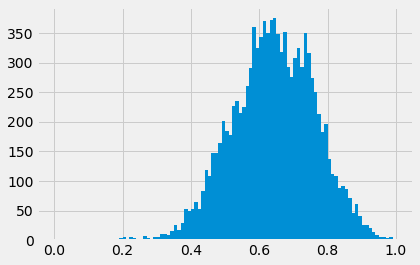

NPS


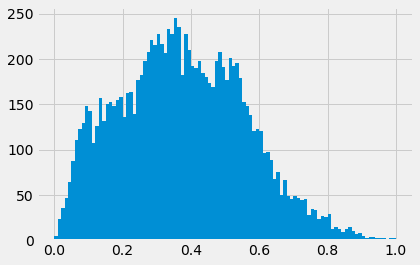

Popularity


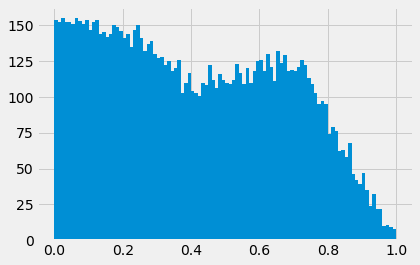

Favorites


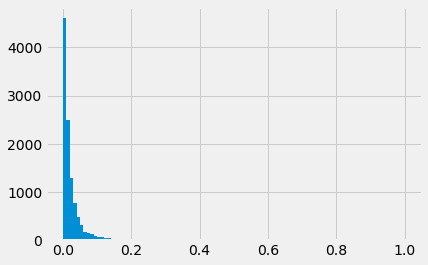

Watching


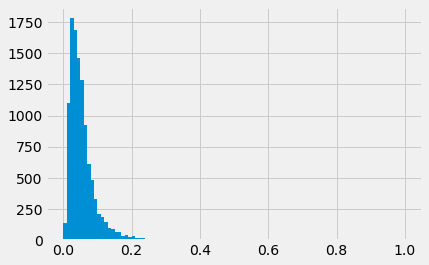

Completed


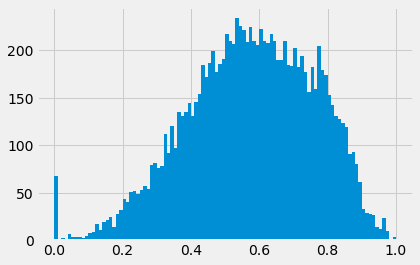

On-Hold


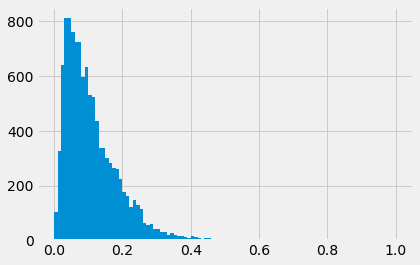

Dropped


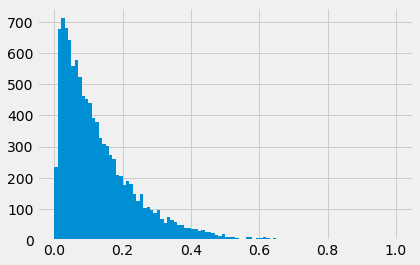

Plan to Watch


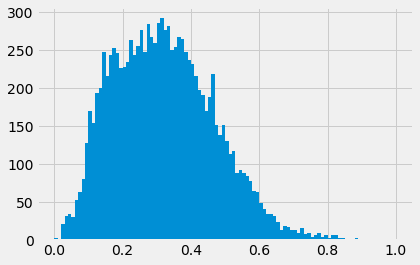

In [79]:
for column in norm_df.columns.values:
    print(column)
    plt.hist(norm_df[column], bins=100)
    plt.show()

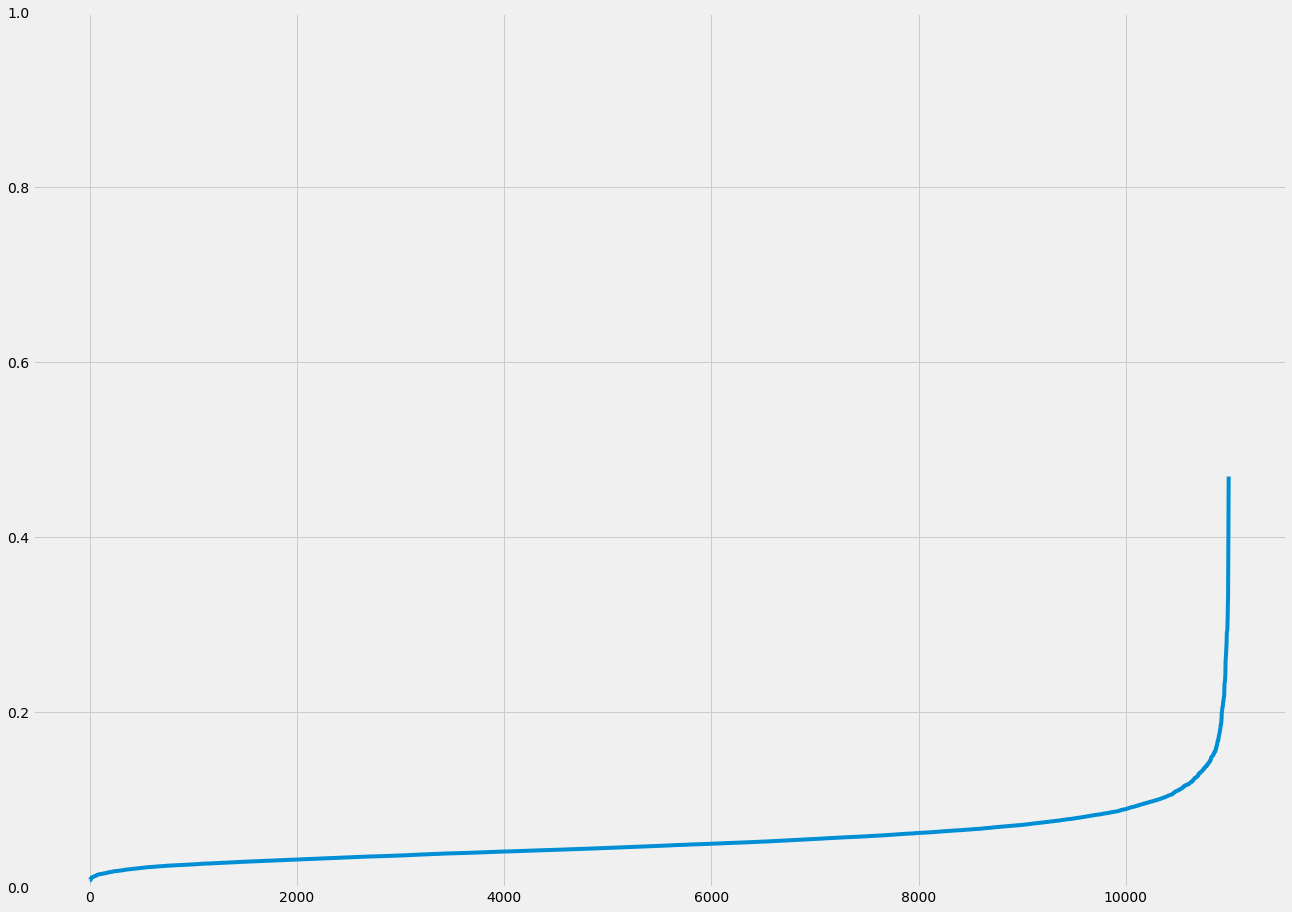

In [9]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(norm_df)
distances, indices = neighbors_fit.kneighbors(norm_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
plt.ylim(0, 1)
plt.plot(distances)

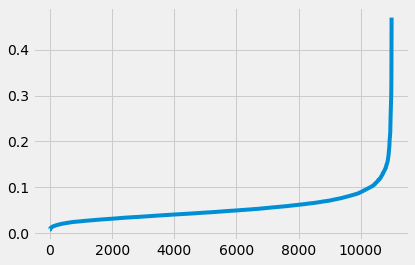

In [18]:
elbow_dbscan(norm_df)

10
28 (-1 9166)
43 (-1 7948)
27 (-1 6822)
19 (-1 5732)
16 (0 6138)
7 (0 6923)
6 (0 7550)
7 (0 8147)
8 (0 8641)
4 (0 9112)


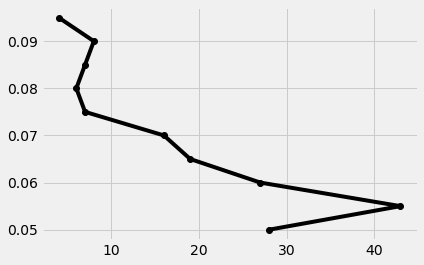

15
19 (-1 10205)
14 (-1 9306)
21 (-1 8189)
15 (-1 6974)
12 (-1 5827)
8 (0 5998)
5 (0 6812)
2 (0 7484)
2 (0 8017)
3 (0 8519)


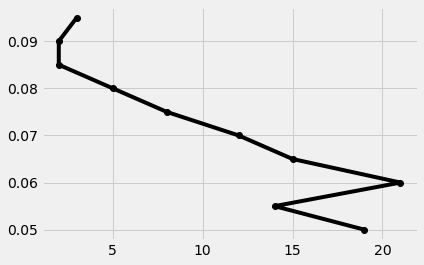

20
6 (-1 10680)
12 (-1 10108)
11 (-1 9243)
14 (-1 8035)
6 (-1 6938)
7 (-1 5793)
6 (0 6109)
3 (0 6868)
3 (0 7545)
3 (0 8049)


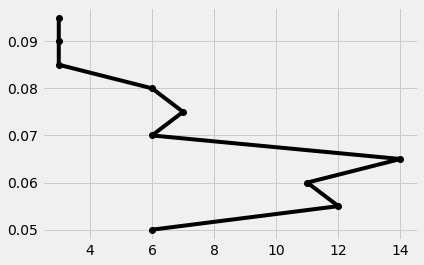

25
3 (-1 10881)
7 (-1 10539)
9 (-1 9916)
6 (-1 8972)
12 (-1 7685)
4 (-1 6684)
4 (-1 5538)
2 (0 6337)
3 (0 7044)
2 (0 7669)


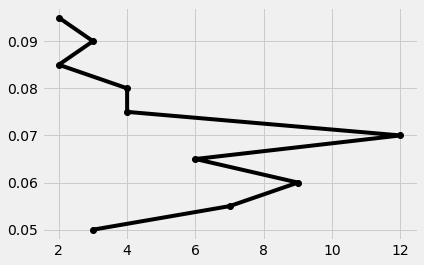

30
1 (-1 10995)
2 (-1 10793)
6 (-1 10394)
10 (-1 9542)
6 (-1 8537)
6 (-1 7316)
4 (-1 6257)
3 (0 5734)
2 (0 6589)
3 (0 7235)


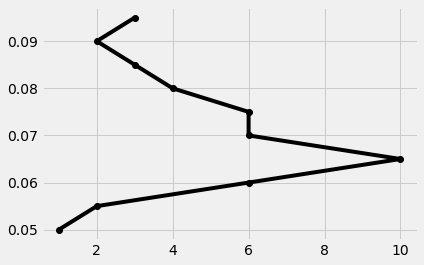

35
1 (-1 10995)
2 (-1 10896)
3 (-1 10691)
5 (-1 10140)
5 (-1 9038)
7 (-1 7996)
4 (-1 6814)
3 (-1 5817)
3 (0 6082)
2 (0 6875)


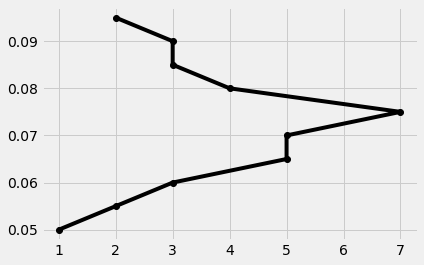

40
1 (-1 10995)
1 (-1 10995)
2 (-1 10794)
6 (-1 10393)
6 (-1 9600)
6 (-1 8477)
6 (-1 7391)
4 (-1 6270)
3 (-1 5366)
3 (0 6438)


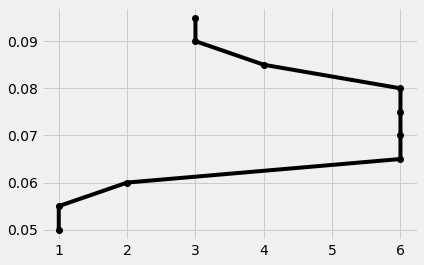

45
1 (-1 10995)
1 (-1 10995)
2 (-1 10888)
2 (-1 10680)
5 (-1 10087)
5 (-1 9012)
6 (-1 7862)
3 (-1 6697)
3 (-1 5814)
3 (0 5209)


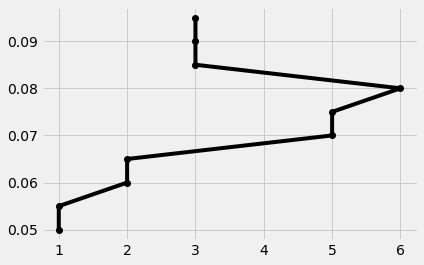

50
1 (-1 10995)
1 (-1 10995)
1 (-1 10995)
2 (-1 10778)
5 (-1 10381)
4 (-1 9550)
6 (-1 8308)
6 (-1 7216)
3 (-1 6147)
3 (-1 5248)


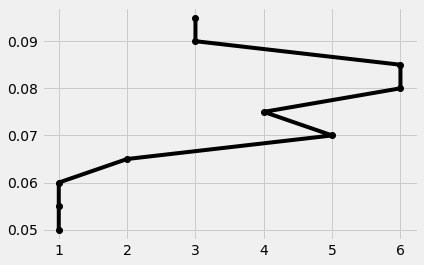

In [19]:
# Определяем модель
# norm_df = norm_df.drop(['Clusters'], axis=1)
samp_i = 10
x = np.array([])
y = np.array([])


while samp_i <= 50:
    print(samp_i)
    eps_i = 0.05
    while eps_i <= 0.1:
    #     print(eps_i)
        dbscan = DBSCAN(eps=eps_i,
        min_samples=samp_i,)
        dbscan.fit(norm_df)
    
        clustersL = dbscan.labels_.tolist()
        print(f"{len(set(clustersL))} ({max(clustersL,key=clustersL.count)} {Counter(clustersL).most_common(1)[0][1]})")
    #     print(len(set(clustersL)))
        x = np.append(x, len(set(clustersL)))
        y = np.append(y, eps_i)
        eps_i += 0.005
    #     print(Counter(clustersL).most_common(1)[0][1])
    #     print('-'*100)
    samp_i += 5
    plt.plot(x, y, '-ok');
    plt.show()
    x = np.array([])
    y = np.array([])
    
# Обучаем

# Уменьшаем размерность при помощи метода главных компонент
# pca = PCA(n_components=9).fit(norm_df)
# pca_3d = pca.transform(norm_df)

In [ ]:
dbscan = DBSCAN(eps=0.635,
    min_samples=45,)
dbscan.fit(norm_df)
clustersL = dbscan.labels_.tolist()
print(set(clustersL))

In [ ]:
dbscan = DBSCAN(eps=0.6,
    min_samples=20,)
dbscan.fit(norm_df)
clustersL = dbscan.labels_.tolist()
print(len(set(clustersL)))
print(max(clustersL,key=clustersL.count))
print(Counter(clustersL).most_common(1)[0][1])

In [89]:
norm_df['Clusters'] = dbscan.labels_

In [90]:
# norm_df[(norm_df["Clusters"] != -1)&(norm_df["Clusters"] != 0)]

for i in range(4):
    print(i)
    print(norm_df[(norm_df["Clusters"] == i)].describe())

0
             Score          NPS   Popularity    Favorites     Watching  \
count  4427.000000  4427.000000  4427.000000  4427.000000  4427.000000   
mean     -0.143081    -0.182729     0.159206    -0.386362    -0.442876   
std       0.904717     0.915235     0.899651     0.202884     0.217100   
min      -2.826092    -2.021949    -1.519210    -0.596452    -0.874245   
25%      -0.805551    -0.923680    -0.590851    -0.543462    -0.606555   
50%      -0.072828    -0.178043     0.116995    -0.434627    -0.476216   
75%       0.571080     0.541310     0.854001    -0.285539    -0.310740   
max       1.992120     2.214038     2.254048     0.587529     0.553138   

         Completed      On-Hold      Dropped  Plan to Watch  Clusters  
count  4427.000000  4427.000000  4427.000000    4427.000000    4427.0  
mean      0.530851    -0.611005    -0.504052      -0.305072       0.0  
std       0.736663     0.381321     0.530098       0.841297       0.0  
min      -1.332857    -1.372172    -1.09426

In [14]:
norm_df['Clusters'].unique()

array([-1,  0,  1,  4,  2,  3])

In [2]:
# plt.figure(figsize=(16,12))
# X = norm_df

# core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
# unique_labels = set(dbscan.labels_)
# n_clusters_ = len(set(unique_labels)) - (1 if -1 in unique_labels else 0)

# colors = [plt.cm.Spectral(each)
#           for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = (unique_labels == k)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy.iloc[:, 4], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
#     ax = plt.gca()
#     ax.set_xlabel('Company_Location_label', fontsize=15)
#     ax.set_ylabel('Rating', fontsize=15)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

In [90]:
genres = pd.read_csv("./genres.csv")
# genres['Score'] = genres['Score']/10
animeNames = genres['Name']
genres.set_index('Name', inplace=True)
genres.drop(columns = ['Genres'], inplace = True)
genres.drop(columns = ['Score'], inplace = True)


In [110]:
for column in norm_df.columns.values:
    genres[column] = norm_df[column]

In [11]:
new_df = sorted_.Genres.str.split(', ', expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Name', 'Frequency'] 
# pd.set_option('display.max_rows', 15)

genresNames = new_df['Name']

new_df.sort_values(by=['Frequency'], ascending=False)
genres = pd.DataFrame(new_df['Name'])
genres.set_index('Name', inplace=True)
genres= genres.T
genres[['Name', 'Genres', 'Score']] = sorted_[['Name', 'Genres', 'Score']]
genres.set_index('Name', inplace=True)
# print(genres.columns.values) 

In [82]:
genres

,Comedy,Action,Fantasy,Adventure,Sci-Fi,Drama,Shounen,Romance,School,Slice of Life,...,Unknown,Score,NPS,Popularity,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
Name,,,,,,,,,,,,,,,,,,,,,
Cowboy Bebop,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.944142,0.894263,0.002472,0.373494,0.109443,0.589137,0.251559,0.060763,0.259244
Cowboy Bebop: Tengoku no Tobira,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.891008,0.808701,0.033630,0.032431,0.019642,0.783339,0.031198,0.008039,0.205104
Trigun,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.870572,0.759049,0.013010,0.174747,0.067453,0.631186,0.200652,0.071044,0.258649
Witch Hunter Robin,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.738420,0.501025,0.095362,0.046779,0.058810,0.500756,0.238192,0.161967,0.357233
Bouken Ou Beet,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.698910,0.424262,0.284135,0.010271,0.062868,0.568038,0.255100,0.238921,0.252085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kimetsu Gakuen: Valentine-hen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.645777,0.346647,0.248032,0.029914,0.043995,0.394617,0.028615,0.009735,0.585306
Heikousen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.772480,0.670616,0.706954,0.244865,0.026460,0.677695,0.042346,0.003427,0.307306
Nu Wushen de Canzhuo Spring Festival Special,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.678474,0.511512,0.778768,0.111785,0.122302,0.319522,0.146799,0.010561,0.570002


In [13]:
for genre in genresNames:
    for anime in animeNames:
        if genre in genres['Genres'][anime]:
            genres[genre][anime] = 1
genres.fillna(0, inplace = True)

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
# def Euclidean_Dist(df1, df2, cols=['x_coord','y_coord']):
#     return np.linalg.norm(df1[cols].values - df2[cols].values,
#                    axis=1)
# dist = Euclidean_Dist(genres, genres, genres.columns)

from scipy.spatial import distance
ary = distance.cdist(genres.iloc[:,:], genres.iloc[:,:], metric='euclidean')
dist = pd.DataFrame(ary, columns = animeNames)
dist["Name"] = animeNames
dist.set_index('Name', inplace=True)

In [25]:
distDesc = dist.describe().reset_index()
distDesc = distDesc.T

In [83]:
for column in distDesc.columns.values:
    print(column)
    plt.hist(distDesc[column])
    plt.show()

NameError: name 'distDesc' is not defined

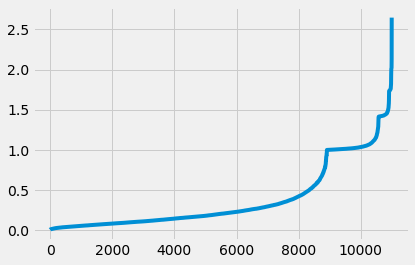

In [111]:
neighbors = NearestNeighbors(n_neighbors=50)
neighbors_fit = neighbors.fit(genres)
distances, indices = neighbors_fit.kneighbors(genres)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [119]:
# genres = genres.drop(['Clusters'], axis=1)
dbscan = DBSCAN(eps=1.00,
    min_samples=50,)
dbscan.fit(genres)
clustersL = dbscan.labels_.tolist()
print(len(set(clustersL)))
print(max(clustersL,key=clustersL.count))
print(Counter(clustersL).most_common(1)[0][1])

16
-1
9050


In [120]:
genres['Clusters'] = dbscan.labels_

In [121]:
for cluster in set(clustersL):
    print(f"Cluster №{cluster}")
    desc = genres[(genres["Clusters"] == cluster)].describe()
#     print(desc[desc.iloc[(1,0)]>0])
    print(desc.loc[:,(desc.loc["mean"] != 0)])

Cluster №0
       Comedy  School  Slice of Life      Score        NPS  Popularity  \
count    65.0    65.0           65.0  65.000000  65.000000   65.000000   
mean      1.0     1.0            1.0   0.689080   0.428302    0.255083   
std       0.0     0.0            0.0   0.095907   0.158255    0.179289   
min       1.0     1.0            1.0   0.442779   0.086700    0.011644   
25%       1.0     1.0            1.0   0.632153   0.319607    0.130358   
50%       1.0     1.0            1.0   0.698910   0.435789    0.201197   
75%       1.0     1.0            1.0   0.757493   0.549654    0.319131   
max       1.0     1.0            1.0   0.876022   0.766167    0.694204   

       Favorites   Watching  Completed    On-Hold    Dropped  Plan to Watch  
count  65.000000  65.000000  65.000000  65.000000  65.000000      65.000000  
mean    0.021147   0.060867   0.573265   0.127083   0.139528       0.315912  
std     0.030065   0.031232   0.140087   0.068734   0.131010       0.099680  
min     0.

       Drama      Score        NPS  Popularity  Favorites   Watching  \
count   73.0  73.000000  73.000000   73.000000  73.000000  73.000000   
mean     1.0   0.599380   0.298376    0.589144   0.010819   0.041509   
std      0.0   0.100549   0.167827    0.230874   0.023970   0.021080   
min      1.0   0.433243   0.049767    0.019450   0.000000   0.014105   
25%      1.0   0.532698   0.188458    0.447993   0.000000   0.027897   
50%      1.0   0.585831   0.263760    0.659663   0.003967   0.039933   
75%      1.0   0.629428   0.357937    0.763026   0.010524   0.048075   
max      1.0   0.918256   0.865670    0.915566   0.179840   0.147148   

       Completed    On-Hold    Dropped  Plan to Watch  Clusters  
count  73.000000  73.000000  73.000000      73.000000      73.0  
mean    0.562101   0.077051   0.136479       0.356342       6.0  
std     0.178355   0.058319   0.113675       0.168038       0.0  
min     0.199155   0.000000   0.006168       0.100571       6.0  
25%     0.424744   0.

            Comedy       Action      Fantasy    Adventure       Sci-Fi  \
count  9050.000000  9050.000000  9050.000000  9050.000000  9050.000000   
mean      0.420000     0.346077     0.241768     0.236464     0.229392   
std       0.493586     0.475744     0.428178     0.424934     0.420465   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             Drama      Shounen      Romance       School  Slice of Life  ...  \
count  9050.000000  9050.000000  9050.000000  9050.000000    9050.000000  ...   
mean      0.212818     0.207182     0.183094     0.143094       0.113481  ...   
std       0.409322     0.405310     0.386765     0.350188       0.317197  ...   
min      

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


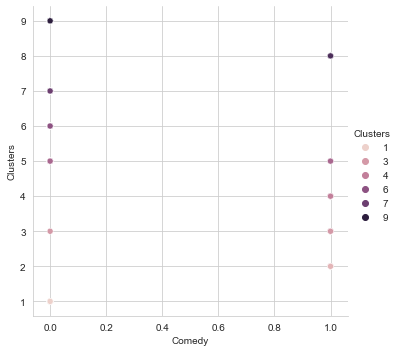

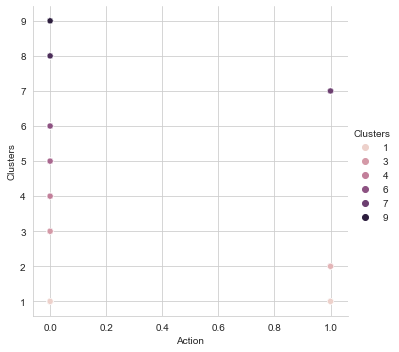

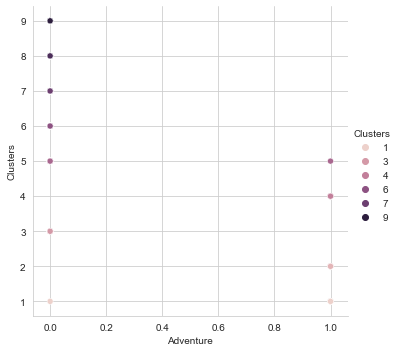

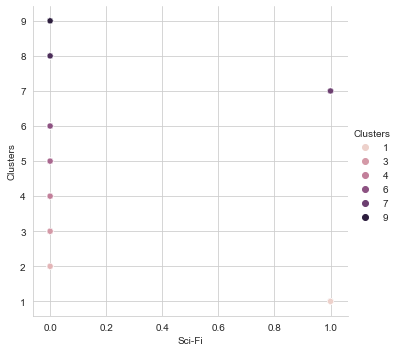

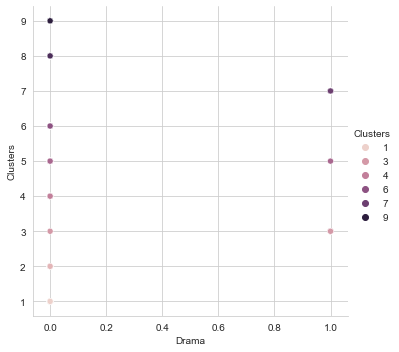

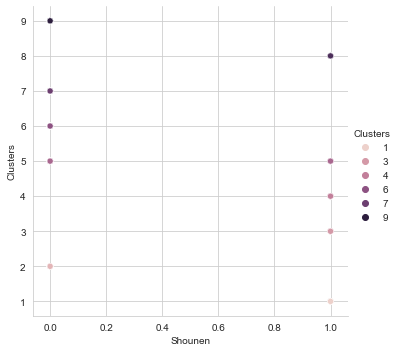

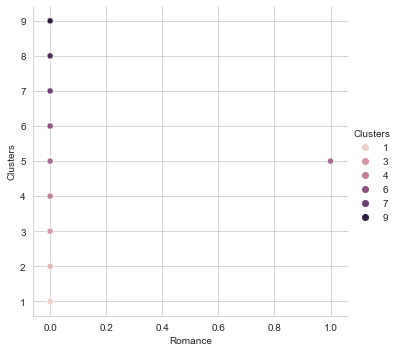

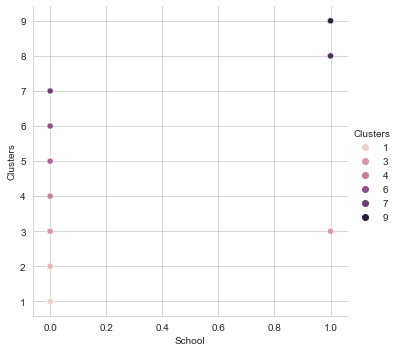

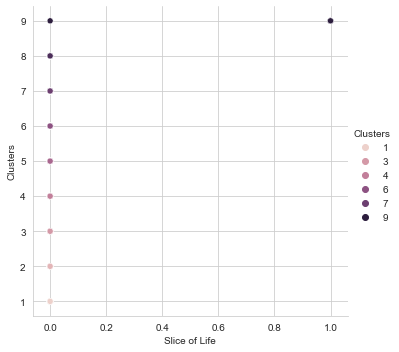

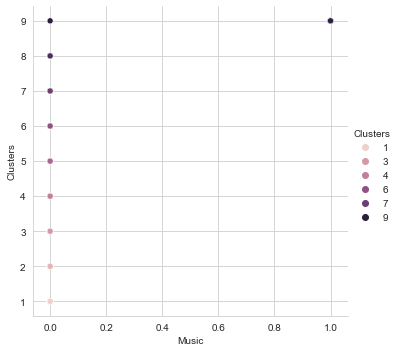

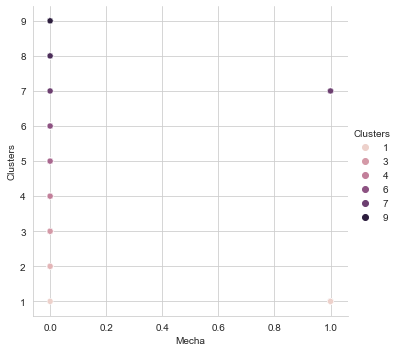

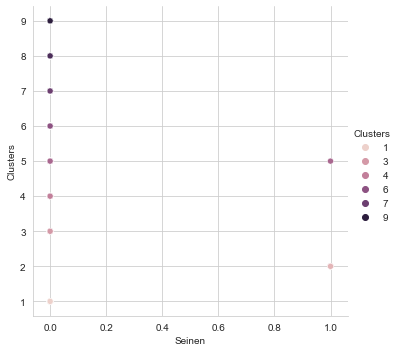

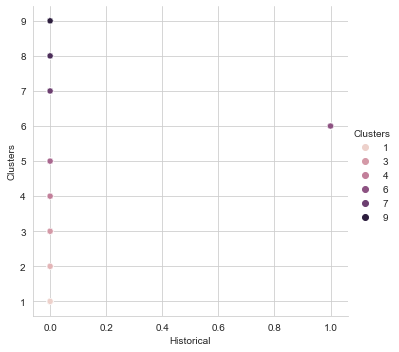

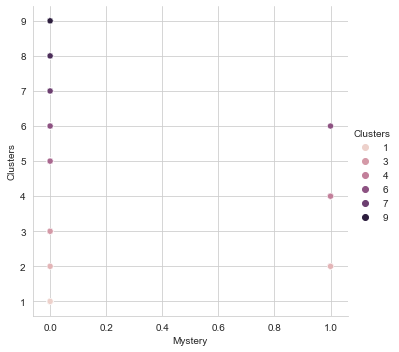

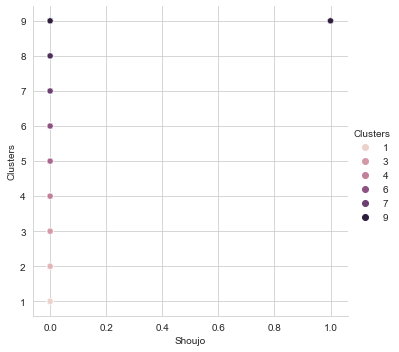

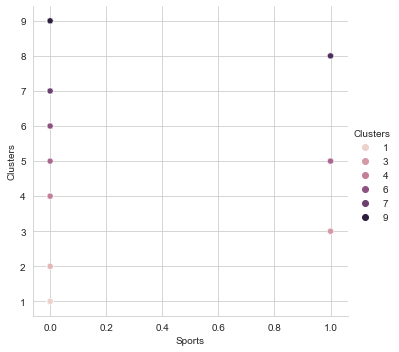

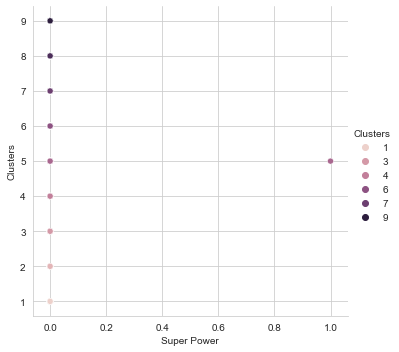

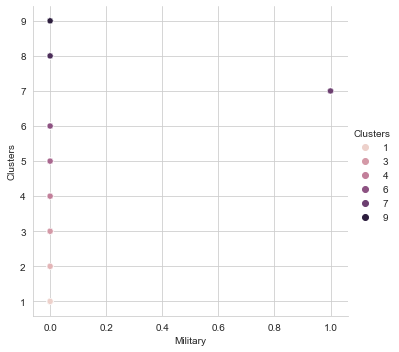

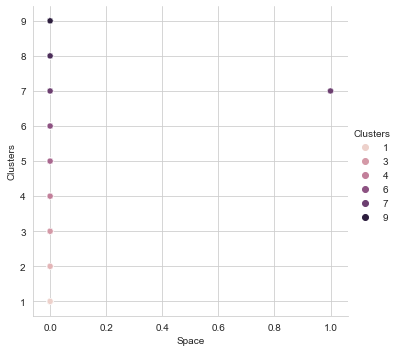

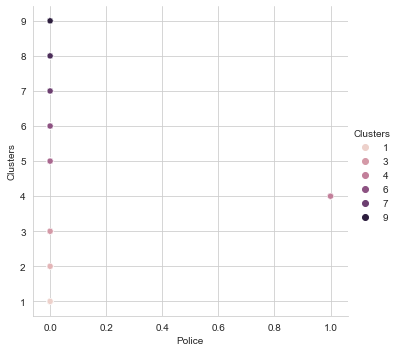

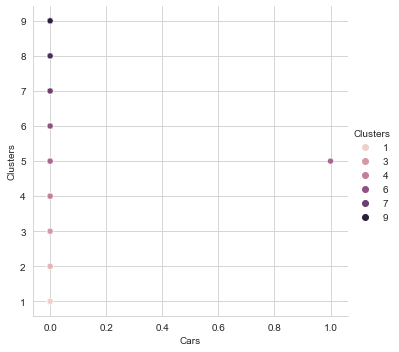

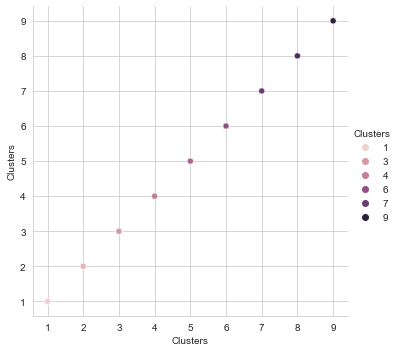

In [10]:
mask = (genres["Clusters"] != -1) & (genres["Clusters"] != 0)
for column in genres.columns:
    if len(genres[mask & (genres[column] == 1)]) > 0:
        sns.relplot(x=column, y="Clusters", hue="Clusters", data=genres[mask]);

In [6]:
sns.set_style("whitegrid")
sns.pairplot(genres[(genres["Clusters"] != -1) & (genres["Clusters"] != 0)], height=3);
plt.show()

In [105]:
dbscan.labels_[:,1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [16]:
genres.to_csv("genres.csv")